# Seaborn

**seaborn** est une librairie de visualisation de données statistiques.

* Elle s'appuie sur **matplotlib**, **scipy** et **statsmodels**
* Des plots plus avec de "meilleures" couleurs par défaut que **matplotlib** 
* Plots adaptés à l'analyse statistique
* Supporte les arrays (**numpy**) et les DataFrame (**pandas**)

---

In [1]:
from IPython.display import HTML
HTML("<iframe src=http://stanford.edu/~mwaskom/software/seaborn/index.html width=900 height=500></iframe>")

---

In [1]:
%matplotlib inline

In [23]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy

In [4]:
x = np.linspace(-2*np.pi, 2*np.pi, num=100)
y = np.sin(x)
np.random.seed(9221999)

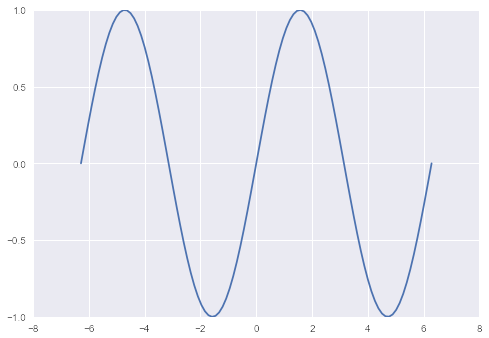

In [7]:
plt.plot(x, y);

* seaborn utilise matplotlib et apporte des styles par défaut

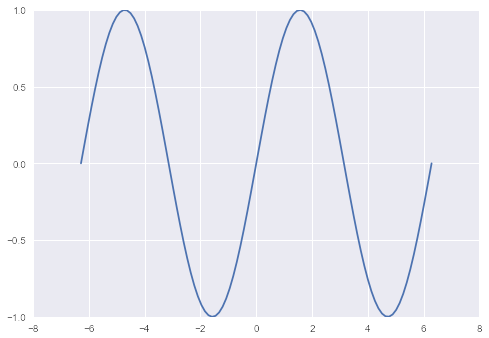

In [6]:
import seaborn as sns
plt.plot(x, y);

* Seaborn fournit des styles par défaut qui utilisent les propriétées de plots de matplotlib:

    * darkgrid
    * whitegrid
    * dark
    * white
    * ticks

{'legend.numpoints': 1, 'axes.axisbelow': True, 'font.sans-serif': ['Arial', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'axes.labelcolor': '.15', 'ytick.major.size': 0, 'axes.grid': True, 'ytick.minor.size': 0, 'legend.scatterpoints': 1, 'axes.edgecolor': '.8', 'grid.color': '.8', 'axes.linewidth': 1, 'ytick.color': '.15', 'legend.frameon': False, 'xtick.color': '.15', 'xtick.minor.size': 0, 'font.family': ['sans-serif'], 'xtick.direction': 'out', 'lines.solid_capstyle': 'round', 'grid.linestyle': '-', 'image.cmap': 'Greys', 'axes.facecolor': 'white', 'text.color': '.15', 'ytick.direction': 'out', 'xtick.major.size': 0}


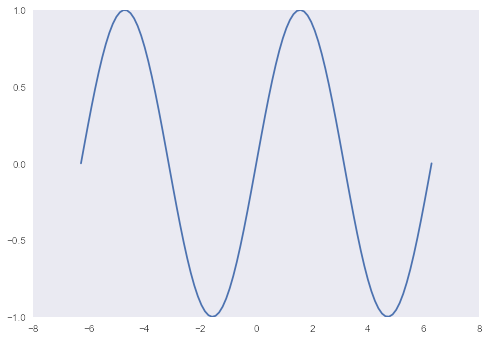

In [14]:
print sns.axes_style("whitegrid")
sns.set_style("dark")
plt.plot(x, y);

* Les autres propriétés des plots comme la taille sont définis pas `set_context` et `plotting_context`

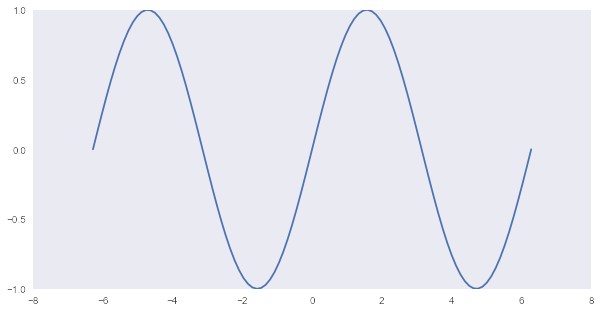

In [15]:
sns.set_context(rc={"figure.figsize": (10, 5)})
# sns.plotting_context
plt.plot(x, y)

* Les palettes de couleurs peuvent être modifiées avec `color_palette` et `set_palette`:

    * deep
    * muted
    * pastel
    * bright
    * dark
    * colorblind

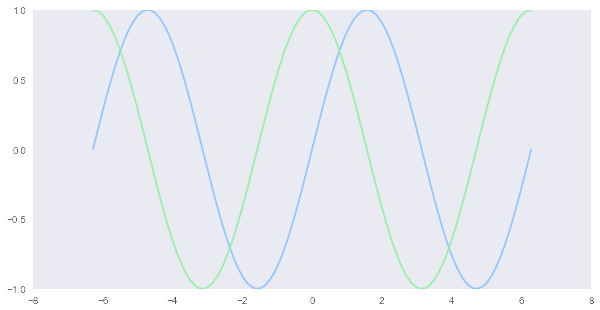

In [20]:
#print sns.color_palette("deep")
sns.set_palette("pastel")
plt.plot(x, y)
plt.plot(x, np.cos(x));

## jointplot

TypeError: barh() got multiple values for keyword argument 'bottom'

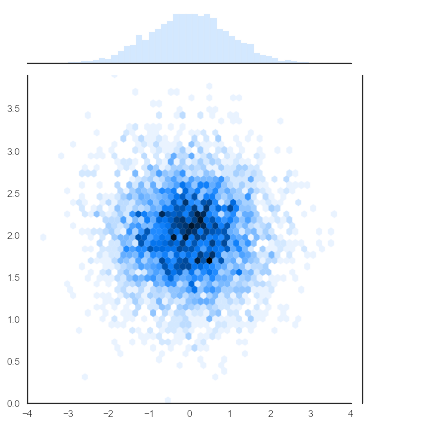

In [24]:
x = np.random.normal(0, 1, size=5000)
y = np.random.normal(2, 0.5, size=5000)

with sns.axes_style("white"):
    sns.jointplot(x, y, kind="hexbin");

## Estimer la densité des observations avec *rugplot* et *kdeplot*

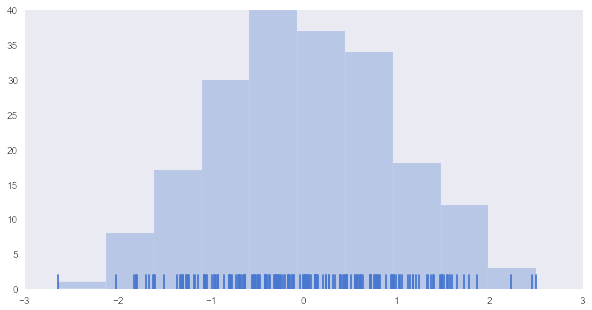

In [25]:
data = np.random.normal(size=200)
sns.set_palette("muted", 1)
plt.hist(data, alpha=0.3)
sns.rugplot(data);

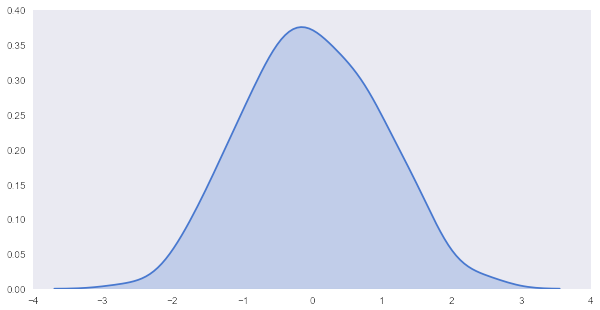

In [29]:
#plt.hist(data, alpha=0.3, normed=True);
sns.kdeplot(data, shade=True);
#sns.kdeplot()

## Estimation de la densité des données multidimensionnelles avec *kdeplot*

In [13]:
x = np.random.normal(size=200)
y = np.random.normal(size=200)

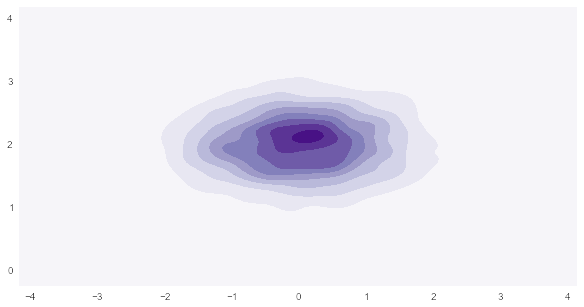

In [32]:
# shade: True, False
# cmap: "Purples", "PuRd_d", "BuGn_d", ...
sns.kdeplot(x, y, shade=True, cmap="Purples");

## Comparer les distributions avec *boxplot* et *violinplot*

In [40]:
data = [x, y]

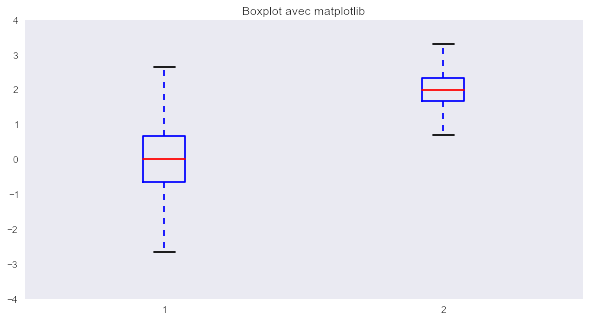

In [41]:
plt.title("Boxplot avec matplotlib")
plt.boxplot(data);

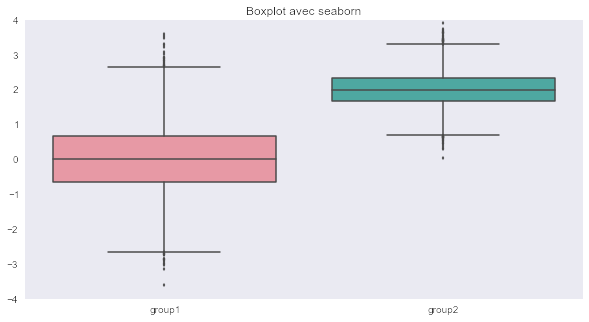

In [43]:
plt.title("Boxplot avec seaborn")
sns.boxplot(data, names=["group1", "group2"]);
# names
# color 


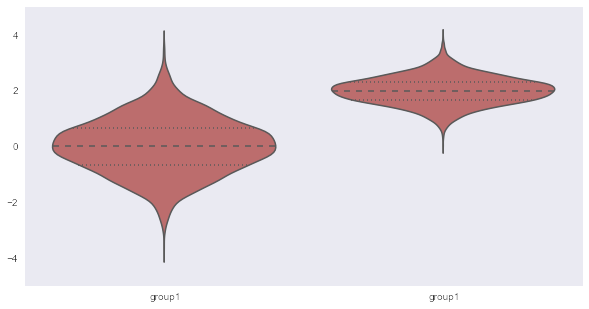

In [44]:
sns.violinplot(data, names=["group1", "group1"], color="indianred");

## Modèles linéaires

## Données

In [45]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


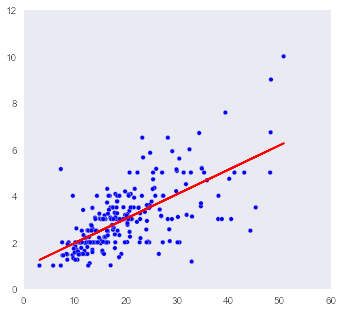

In [46]:
plt.figure(figsize=(5.5, 5))
ar, br = scipy.polyfit(tips.total_bill, tips.tip, 1)
plt.scatter(tips.total_bill, tips.tip);
xr = scipy.polyval([ar,br], tips.total_bill)
plt.plot(tips.total_bill, xr, 'r-');


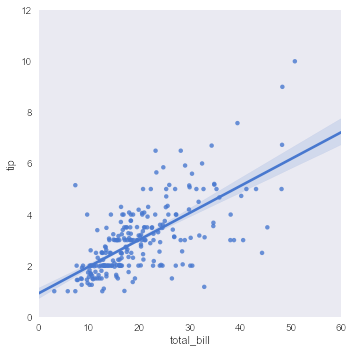

In [48]:
sns.lmplot("total_bill", "tip", data=tips, ci=68);
# ci (intervalle de confiance par défaut 95%) 